# 3️⃣ 신한은행 - 서울시 지역단위 '소득', '지출', '금융자산' 정보

---

## 전체 데이터 파악하기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumBarunpenR.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
file_path = './신한은행_서울시 지역단위 \'소득\', \'지출\', \'금융자산\' 정보.csv'
df = pd.read_csv(file_path, encoding='cp949')

print(df.shape)
print(df.info())
df.head()

(1039568, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039568 entries, 0 to 1039567
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   기준년월      1039568 non-null  int64  
 1   지역구       1039568 non-null  object 
 2   법정동코드     1039568 non-null  int64  
 3   법정동       1039568 non-null  object 
 4   집계구코드     1039568 non-null  float64
 5   나이        1039568 non-null  int64  
 6   성별        1039568 non-null  int64  
 7   직장인여부     1039568 non-null  int64  
 8   급여입금      1039568 non-null  int64  
 9   가맹점매출입금   1039568 non-null  int64  
 10  연금입금      1039568 non-null  int64  
 11  총소비금액     1039568 non-null  int64  
 12  총수신금액     1039568 non-null  int64  
 13  예적금금액     1039568 non-null  int64  
 14  신탁금액      1039568 non-null  int64  
 15  수익증권금액    1039568 non-null  int64  
 16  신용대출금액    1039568 non-null  int64  
 17  담보대출금액    1039568 non-null  int64  
 18  주택대출금액    1039568 non-null  int64  
 19  전세자금대출금

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1.120000e+12,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1.120000e+12,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1.120000e+12,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1.120000e+12,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1.120000e+12,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


In [3]:
df.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

##### 결측 데이터 조회 - 없음

In [4]:
#df.isnull().sum()

---

#### 자치구 ('지역구') 확인하기

In [5]:
county = df['지역구'].unique()

# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(county)):
    iscounty.append(df['지역구'] == county[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(25):
    counties.append(df[iscounty[j]])

---

# ✍🏻

## 성별과 나이

### 📌 서울특별시 전체 인구 대상

In [6]:
### 서울특별시 전체 대상으로 1(남성)과 2(여성)의 인구가 매우 비슷함

In [7]:
print(df['성별'].value_counts())

1    525568
2    514000
Name: 성별, dtype: int64


In [8]:
### 전체적인 인구로 보았을 때, 30대가 약 20만명으로 가장 많고, 70대가 14만명으로 가장 적다.
## 중장년층인 4,5,60대에 비해 2,30대 청년층의 인구가 비교적 적다.

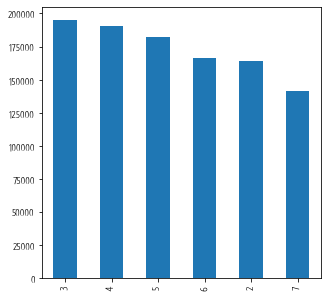

20대 : 164028
30대 : 195404
40대 : 190299
50대 : 181982
60대 : 166513
70대 : 141342


In [9]:
plt.figure(figsize=(5,5))
df['나이'].value_counts().plot.bar()
plt.show()

for i in range(6):
    print(str(i+2) + '0대 :', len(df[df['나이'] == (i+2)]))

In [10]:
### 각 연령대 기준으로 성별 비율이 유사함
## 20대, 30대는 여성이 더 많고 그 외는 모두 남성이 더 많음

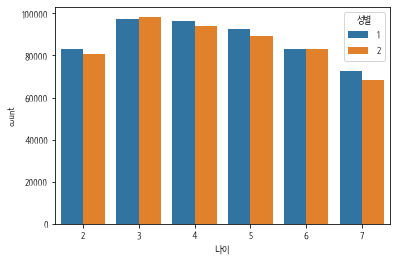

In [11]:
ax = sns.countplot(x='나이', hue = '성별', data = df)

In [12]:
thirty = df['나이'] == 3
man = df['성별'] == 1
woman = df['성별'] == 2

print(len(df[thirty & man]))
print(len(df[thirty & woman]))

97221
98183


---

### 📌 각 자치구 개별적 대상

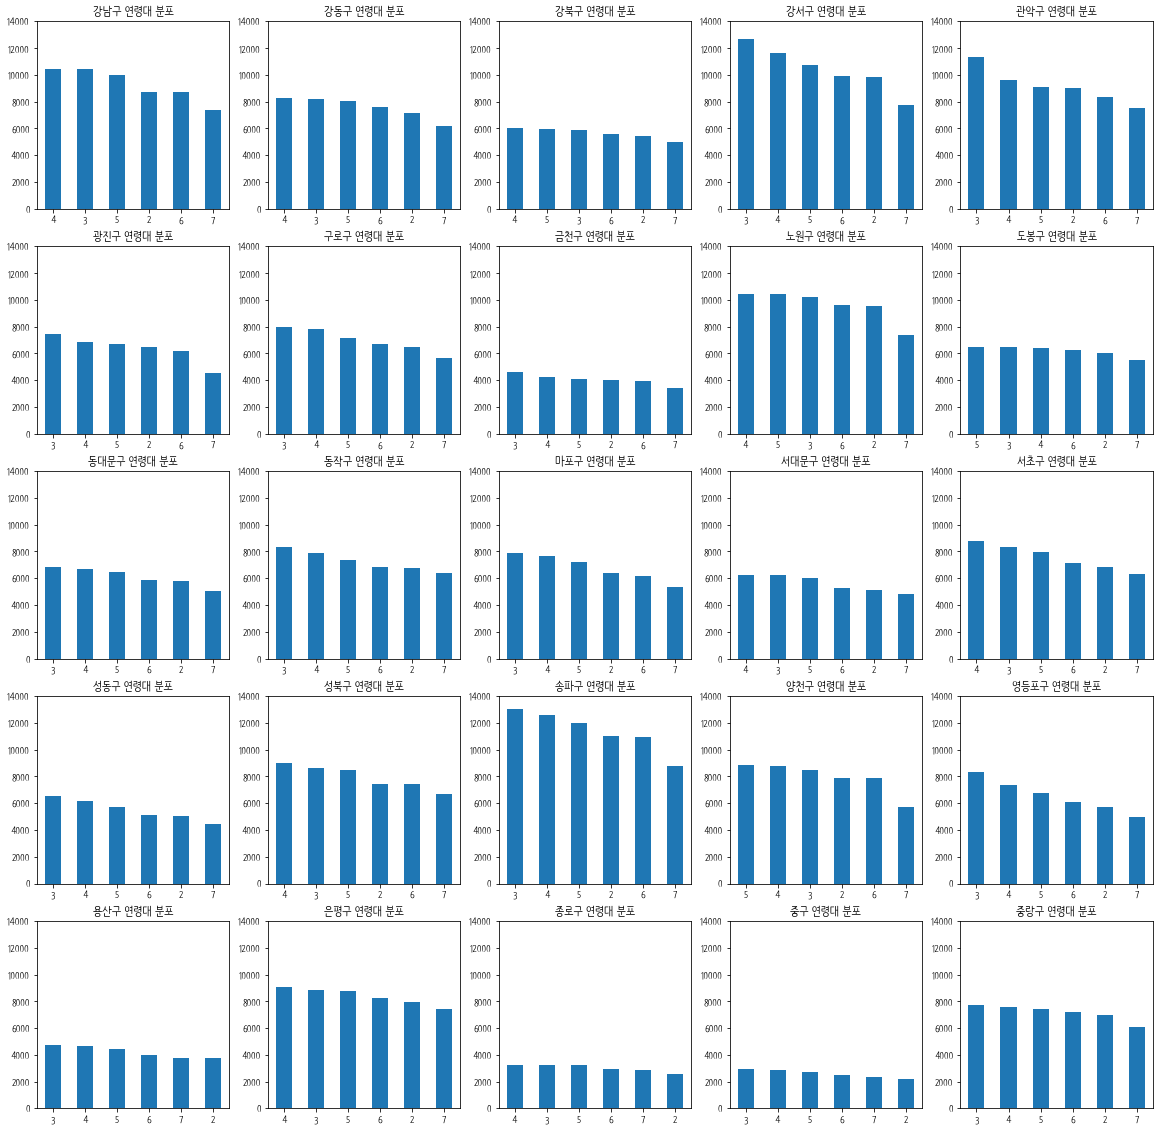

In [13]:
plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    counties[i]['나이'].value_counts().plot.bar()
    plt.ylim([0, 14000])
    plt.xticks(rotation=0)
    plt.title(county[i] + ' 연령대 분포')

plt.show()

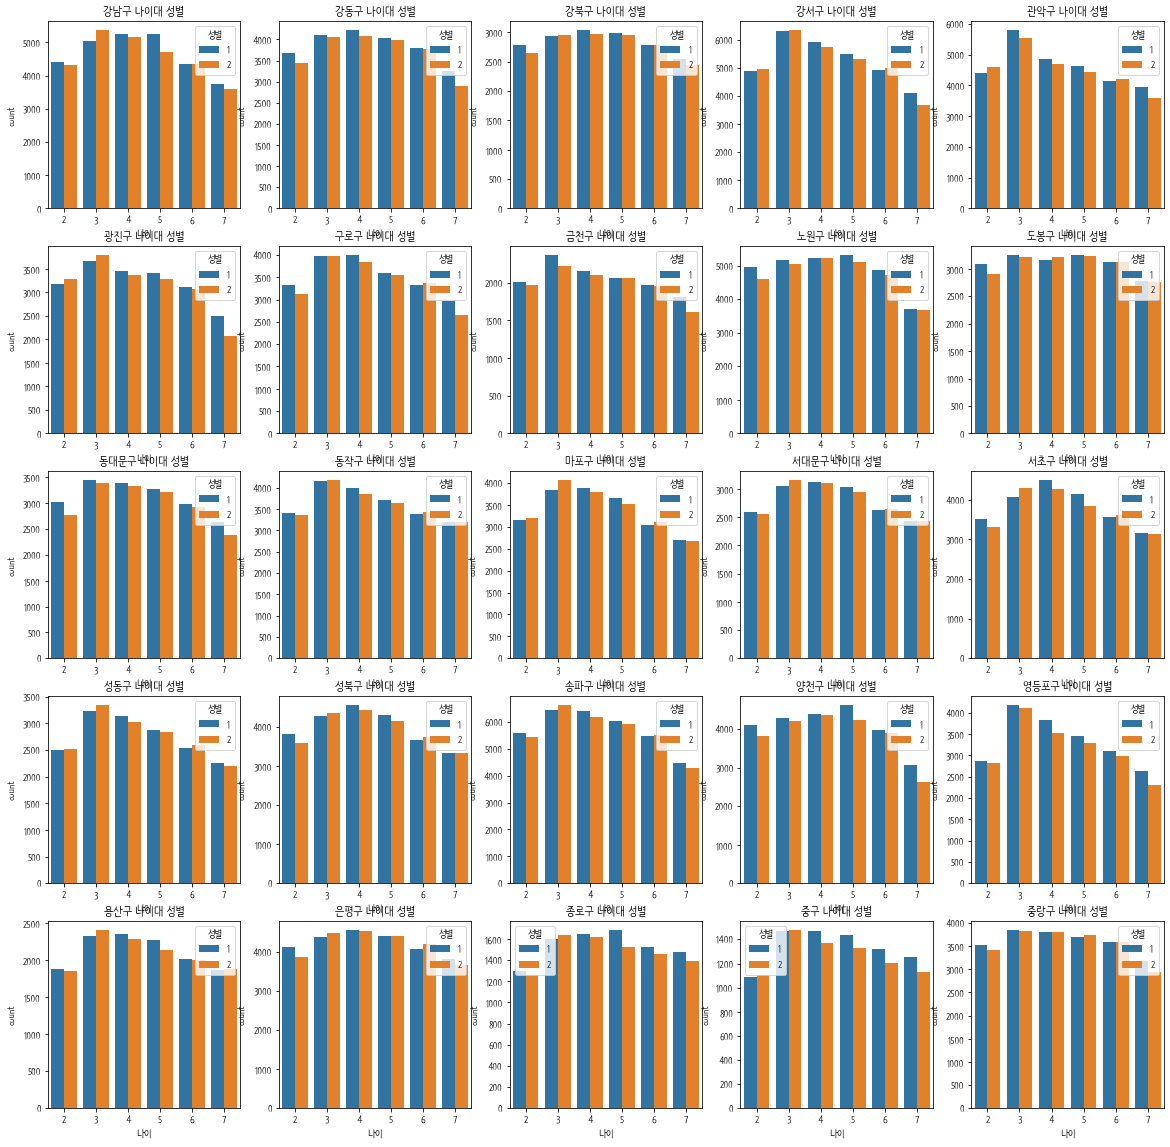

In [14]:
plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    sns.countplot(x='나이', hue = '성별', data = counties[i])
    plt.title(county[i] + ' 나이대 성별')

plt.show()

---

# 🔔 총소비금액

### ⚪각 자치구 별 총소비금액이 0 이하인 데이터 확인하기

In [15]:
iszero = []
sum = 0
for i in range(25):
    iszero.append(counties[i]['총소비금액'] <= 0)
    #print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))



총합 : 246787


#### ⚫ 각 자치구 별 총소비금액 평균 (원본)

In [16]:
# 각 자치구 별 총소비금액 평균
mean = []
for i in range(25):
    mean.append(counties[i]['총소비금액'].mean())
    #print(county[i] + ' : '+ str(counties[i]['총소비금액'].mean()))

---

#### ⚫ 각 자치구 별로 '총소비금액'이 0 이하인 데이터에 평균값(자치구 단위)으로 넣어주기

In [17]:
for i in range(25):
    counties[i].loc[iszero[i], '총소비금액'] = counties[i]['총소비금액'].mean()

C:\Users\serak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


---

#### ⚫ 각 자치구 별 총소비금액 평균 (가공 이후)

In [18]:
for i in range(25):
    mean.append(counties[i]['총소비금액'].mean())
    #print(county[i] + ' : '+ str(counties[i]['총소비금액'].mean()))

---

# 🔔 총수신금액

### ⚪  '총수신금액'이 0 이하인 데이터 확인하기

In [19]:
iszero = []
sum = 0
for i in range(25):
    iszero.append(counties[i]['총수신금액'] <= 0)
    #print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))



총합 : 3


#### ⚫ 각 자치구 별 총수신금액

In [20]:
# 각 자치구 별 총수신금액 평균
mean = []
for i in range(25):
    mean.append(counties[i]['총수신금액'].mean())
    #print(county[i] + ' : '+ str(counties[i]['총수신금액'].mean()))

---

# 🔔 직장인여부 / 급여입금

### ⚪ 자치구 별 직장인 수(급여입금 받는 인원수) 확인하기

In [21]:
# 자치구 별로 급여입금 받는 인원수 확인하기
isworker = []
sum = 0
for i in range(25):
    isworker.append(counties[i]['급여입금'] > 0)
    #print(county[i] + ' : ' + str(len(counties[i][isworker[i]])))
    sum += len(counties[i][isworker[i]])

print("\n\n총합 : " + str(sum))



총합 : 36009


#### ⚫ 각 자치구 별 직장인 대상 급여입금 평균
** 급여입금이 없는 사람들, 즉, 직장인에 해당하지 않는 사람들 제외

In [22]:
# 각 자치구 별 직장인 대상 급여입금 평균 
mean = []
for i in range(25):
    mean.append(counties[i][isworker[i]]['급여입금'].mean())
    #print(county[i] + ' : '+ str(counties[i][isworker[i]]['급여입금'].mean()))

---

## 🟡 총소비금액 & 총수신금액 & 직장인 수 & 급여입금 - 막대 그래프, 꺾은선 그래프
- 직장인 수
- 총소비금액 & 급여입금 모두 0 데이터 제외 이후 평균 값으로 적용 !!
- 급여입금은 직장인 대상 평균

In [23]:
worker = []
for i in range(25):
    worker.append(len(counties[i][isworker[i]]))

In [24]:
consumption = []
for i in range(25):
    consumption.append(counties[i]['총소비금액'].mean())

In [25]:
asset = []
for i in range(25):
    asset.append(counties[i]['총수신금액'].mean())

In [26]:
pay = []
for i in range(25):
    pay.append(counties[i][isworker[i]]['급여입금'].mean())

---

# ✍🏻

### 급여입금/총소비/총자산 순위

In [27]:
### 급여입금 순위
dic_pay = {}
for i in range(25):
    dic_pay[county[i]] = int(pay[i])

dic_pay = dict(sorted(dic_pay.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_pay.keys())[i] + '\t' + str(list(dic_pay.values())[i]) + ' 원')

1위 : 서초구	4434539 원
2위 : 강남구	4397614 원
3위 : 양천구	4096984 원
4위 : 용산구	3993082 원
5위 : 송파구	3898295 원
6위 : 중구	3735404 원
7위 : 종로구	3684768 원
8위 : 성북구	3668333 원
9위 : 강동구	3586378 원
10위 : 마포구	3571755 원
11위 : 성동구	3542189 원
12위 : 서대문구	3522997 원
13위 : 강북구	3506619 원
14위 : 영등포구	3492250 원
15위 : 광진구	3398319 원
16위 : 동작구	3362681 원
17위 : 구로구	3261096 원
18위 : 노원구	3170992 원
19위 : 강서구	3162227 원
20위 : 동대문구	3139883 원
21위 : 도봉구	3057016 원
22위 : 은평구	3049636 원
23위 : 관악구	2925671 원
24위 : 금천구	2893865 원
25위 : 중랑구	2878703 원


In [28]:
### 총소비금액 순위
dic_cons = {}
for i in range(25):
    dic_cons[county[i]] = int(consumption[i])

dic_cons = dict(sorted(dic_cons.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_cons.keys())[i] + '\t' + str(list(dic_cons.values())[i]) + ' 원')

1위 : 강남구	1914132 원
2위 : 서초구	1870463 원
3위 : 용산구	1708576 원
4위 : 송파구	1587059 원
5위 : 성동구	1581830 원
6위 : 중구	1576351 원
7위 : 마포구	1541429 원
8위 : 종로구	1504799 원
9위 : 양천구	1462725 원
10위 : 강서구	1452815 원
11위 : 영등포구	1451760 원
12위 : 동작구	1438760 원
13위 : 광진구	1431412 원
14위 : 강동구	1408536 원
15위 : 성북구	1403073 원
16위 : 은평구	1381959 원
17위 : 서대문구	1379245 원
18위 : 관악구	1371172 원
19위 : 도봉구	1366498 원
20위 : 구로구	1364992 원
21위 : 중랑구	1356135 원
22위 : 동대문구	1334980 원
23위 : 금천구	1333950 원
24위 : 노원구	1330321 원
25위 : 강북구	1273048 원


In [29]:
### 총수신금액 순위
dic_ass = {}
for i in range(25):
    dic_ass[county[i]] = int(asset[i])

dic_ass = dict(sorted(dic_ass.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_ass.keys())[i] + '\t' + str(list(dic_ass.values())[i]) + ' 원')

1위 : 서초구	6559954 원
2위 : 강남구	6541343 원
3위 : 송파구	5233921 원
4위 : 용산구	5016620 원
5위 : 성동구	4701616 원
6위 : 마포구	4656763 원
7위 : 중구	4401267 원
8위 : 종로구	4385111 원
9위 : 동작구	4373611 원
10위 : 양천구	4336122 원
11위 : 영등포구	4263833 원
12위 : 강서구	4084911 원
13위 : 성북구	3974936 원
14위 : 강동구	3965753 원
15위 : 광진구	3886307 원
16위 : 서대문구	3821235 원
17위 : 도봉구	3765938 원
18위 : 구로구	3743025 원
19위 : 노원구	3682922 원
20위 : 은평구	3681698 원
21위 : 관악구	3555417 원
22위 : 동대문구	3440613 원
23위 : 중랑구	3341291 원
24위 : 금천구	3193268 원
25위 : 강북구	2945819 원


### 자치구 별 급여입금에 따른 총소비금액과 총수신금액

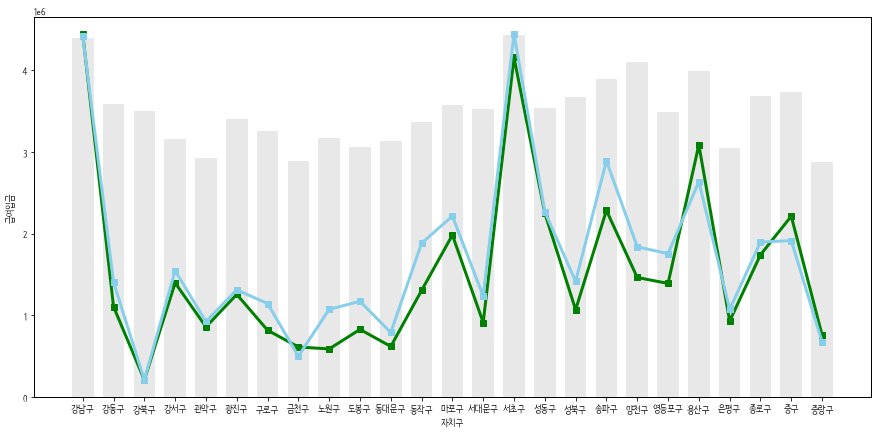

In [30]:
# x축 : 자치구 = county
# y축 막대 : 급여입금 = pay
# y축 선 green : 총소비금액
# y축 선 skyblue : 총수신금액

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(county, pay, color='lightgray', label='급여입금', alpha=0.5, width=0.7)
ax1.set_xlabel('자치구')
ax1.set_ylabel('급여입금')

ax2 = ax1.twinx()
ax2.plot(county, consumption,'-s', color='green', label='총소비금액', markersize=6, linewidth=3)
ax2.set_xlabel('자치구')
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3.plot(county, asset,'-s', color='skyblue', label='총수신금액', markersize=6, linewidth=3)
ax3.set_xlabel('자치구')
ax3.set_yticks([])

plt.show()

---

### (급여입금 - 총소비금액) 차이 비교하기

In [31]:
money = {}
for i in range(25):
    money[county[i]] = int(pay[i] - consumption[i])

dic_money = dict(sorted(money.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_money.keys())[i] + '\t' + str(list(dic_money.values())[i]) + ' 원')

1위 : 양천구	2634258 원
2위 : 서초구	2564075 원
3위 : 강남구	2483481 원
4위 : 송파구	2311235 원
5위 : 용산구	2284506 원
6위 : 성북구	2265259 원
7위 : 강북구	2233571 원
8위 : 종로구	2179968 원
9위 : 강동구	2177842 원
10위 : 중구	2159053 원
11위 : 서대문구	2143752 원
12위 : 영등포구	2040490 원
13위 : 마포구	2030326 원
14위 : 광진구	1966907 원
15위 : 성동구	1960358 원
16위 : 동작구	1923920 원
17위 : 구로구	1896103 원
18위 : 노원구	1840671 원
19위 : 동대문구	1804903 원
20위 : 강서구	1709412 원
21위 : 도봉구	1690518 원
22위 : 은평구	1667676 원
23위 : 금천구	1559915 원
24위 : 관악구	1554498 원
25위 : 중랑구	1522568 원


### 자치구 별 급여 대비 소비 경향 비교 (총소비금액 / 급여입금)
- 급여, 총소비금액 모두 자치구 평균 값을 이용
- 값이 높을 수록 소비 경향이 강함

- 급여 대비 소비 경향이 있어야 할 것 같은 이유 
: 강남구, 서초구와 같은 경우 자산이 많은 상위권에 속하고 그 자산에 비해 소비금액이 적은거인데 다른 구들에 비해 소비 경향이 너무 적게 나옴

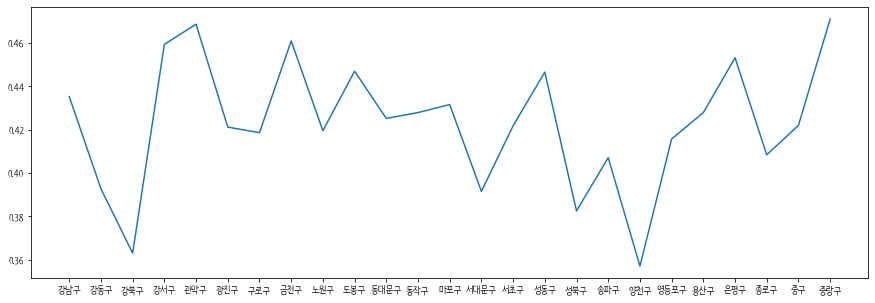

1위 : 중랑구	0.4711
2위 : 관악구	0.4687
3위 : 금천구	0.461
4위 : 강서구	0.4594
5위 : 은평구	0.4532
6위 : 도봉구	0.447
7위 : 성동구	0.4466
8위 : 강남구	0.4353
9위 : 마포구	0.4316
10위 : 동작구	0.4279
11위 : 용산구	0.4279
12위 : 동대문구	0.4252
13위 : 중구	0.422
14위 : 서초구	0.4218
15위 : 광진구	0.4212
16위 : 노원구	0.4195
17위 : 구로구	0.4186
18위 : 영등포구	0.4157
19위 : 종로구	0.4084
20위 : 송파구	0.4071
21위 : 강동구	0.3927
22위 : 서대문구	0.3915
23위 : 성북구	0.3825
24위 : 강북구	0.363
25위 : 양천구	0.357


In [32]:
money = {}
for i in range(25):
    money[county[i]] = round(consumption[i] / pay[i], 4)

plt.figure(figsize=(15,5))
plt.plot(list(money.keys()), list(money.values()))
plt.show()

dic_money = dict(sorted(money.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_money.keys())[i] + '\t' + str(list(dic_money.values())[i]))

### 자치구 별 자산 대비 소비 경향 비교 (총소비금액 / 총수신금액)
- 총수신금액, 총소비금액 모두 자치구 평균 값을 이용
- 값이 높을 수록 소비 경향이 강함

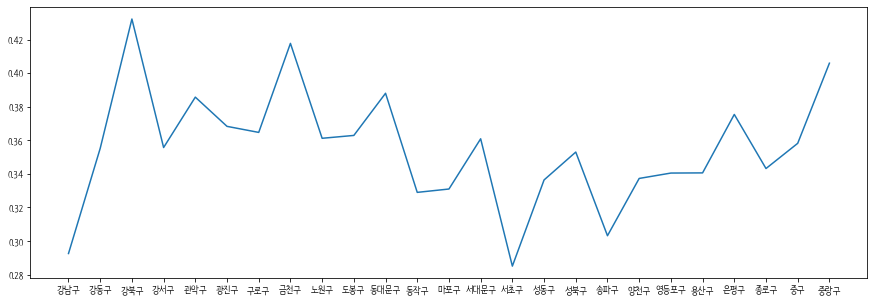

1위 : 강북구	0.4322
2위 : 금천구	0.4177
3위 : 중랑구	0.4059
4위 : 동대문구	0.388
5위 : 관악구	0.3857
6위 : 은평구	0.3754
7위 : 광진구	0.3683
8위 : 구로구	0.3647
9위 : 도봉구	0.3629
10위 : 노원구	0.3612
11위 : 서대문구	0.3609
12위 : 중구	0.3582
13위 : 강서구	0.3557
14위 : 강동구	0.3552
15위 : 성북구	0.353
16위 : 종로구	0.3432
17위 : 용산구	0.3406
18위 : 영등포구	0.3405
19위 : 양천구	0.3373
20위 : 성동구	0.3364
21위 : 마포구	0.331
22위 : 동작구	0.329
23위 : 송파구	0.3032
24위 : 강남구	0.2926
25위 : 서초구	0.2851


In [33]:
money = {}
for i in range(25):
    money[county[i]] = round(consumption[i] / asset[i], 4)

plt.figure(figsize=(15,5))
plt.plot(list(money.keys()), list(money.values()))
plt.show()

dic_money = dict(sorted(money.items(), key=lambda x:x[1], reverse=True))
for i in range(25):
    print(str(i+1) +'위 : ' +list(dic_money.keys())[i] + '\t' + str(list(dic_money.values())[i]))

### 연령대 별 자산 대비 소비 경향 비교
- 총수신금액 대비 총소비금액 비율 (총소비금액 / 총수신금액)
- 값이 높을수록 소비경향 강함

In [34]:
### 강남구와 서초구에서만 연령대가 증가함에 따라 일정하게 감소함 (30대의 소비경향이 40대보다 큼)
## 이외 다른 자치구는 모두 20대 -> 30대는 감소하였다가 30대->40대에서 소비경향이 증가하였고, 
# 그 이후에는 마찬가지로 일정하게 감소함

In [35]:
age_group = []
for i in range(2, 8):
    age_group.append(df['나이'] == i)

man = df['성별'] == 1
woman = df['성별'] == 2  

county_group = []
for i in range(25):
    county_group.append(df['지역구'] == county[i])

강남구 {2: 0.2961, 3: 0.2874, 4: 0.277, 5: 0.2523, 6: 0.1997, 7: 0.1549}


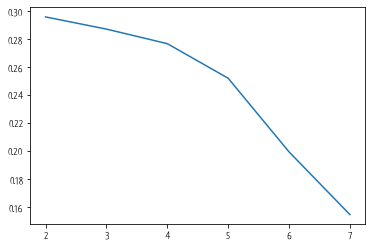

강동구 {2: 0.4143, 3: 0.3536, 4: 0.3628, 5: 0.3029, 6: 0.2372, 7: 0.1283}


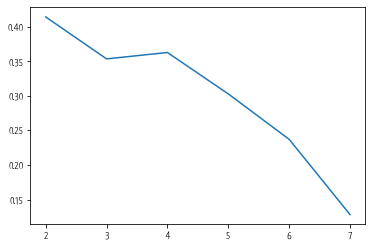

강북구 {2: 0.4787, 3: 0.4382, 4: 0.4566, 5: 0.3821, 6: 0.2498, 7: 0.1376}


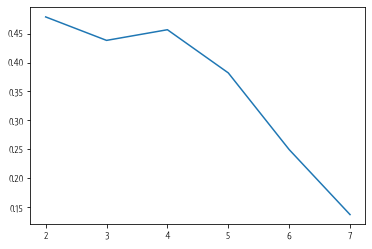

강서구 {2: 0.41, 3: 0.3357, 4: 0.3635, 5: 0.298, 6: 0.228, 7: 0.14}


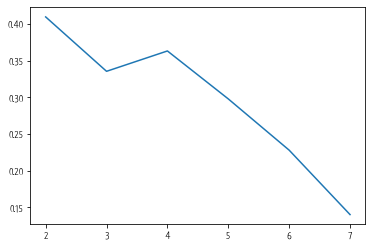

관악구 {2: 0.4977, 3: 0.371, 4: 0.4208, 5: 0.3154, 6: 0.2225, 7: 0.1278}


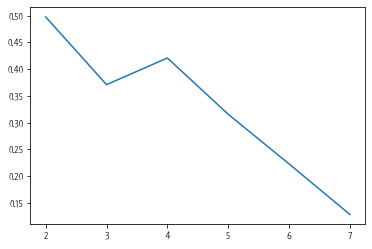

광진구 {2: 0.4499, 3: 0.3601, 4: 0.3628, 5: 0.3024, 6: 0.2068, 7: 0.0978}


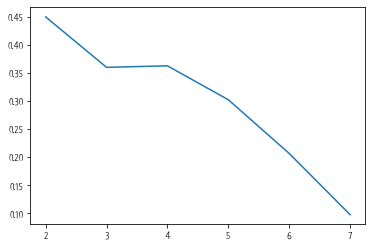

구로구 {2: 0.4056, 3: 0.3505, 4: 0.3779, 5: 0.3135, 6: 0.2358, 7: 0.1304}


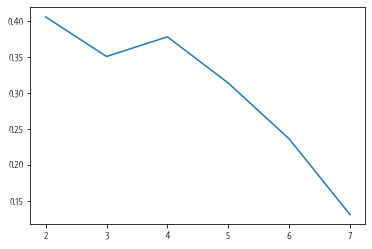

금천구 {2: 0.5032, 3: 0.4226, 4: 0.4444, 5: 0.3791, 6: 0.273, 7: 0.1484}


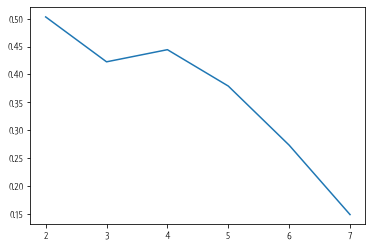

노원구 {2: 0.4046, 3: 0.3333, 4: 0.3566, 5: 0.311, 6: 0.2144, 7: 0.1155}


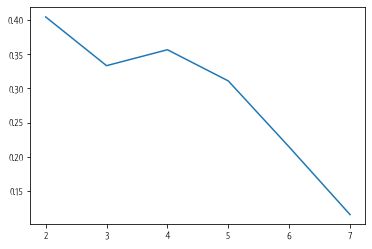

도봉구 {2: 0.4424, 3: 0.3755, 4: 0.394, 5: 0.3408, 6: 0.2398, 7: 0.1327}


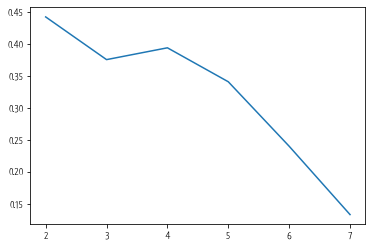

동대문구 {2: 0.424, 3: 0.3767, 4: 0.379, 5: 0.3158, 6: 0.2113, 7: 0.1246}


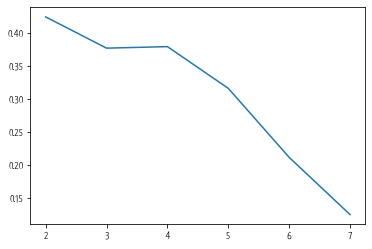

동작구 {2: 0.4093, 3: 0.3325, 4: 0.3437, 5: 0.2883, 6: 0.2087, 7: 0.1487}


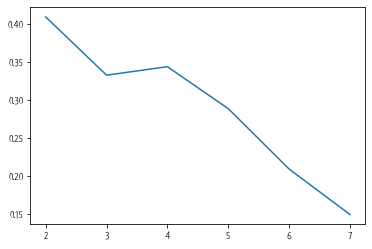

마포구 {2: 0.373, 3: 0.3169, 4: 0.3362, 5: 0.2761, 6: 0.1848, 7: 0.1268}


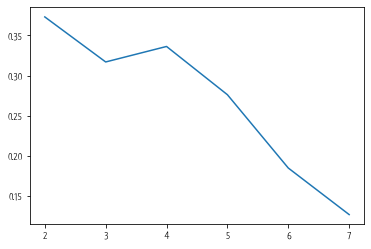

서대문구 {2: 0.4188, 3: 0.337, 4: 0.3468, 5: 0.3055, 6: 0.208, 7: 0.1264}


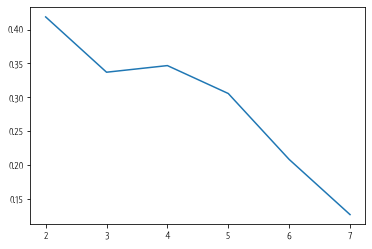

서초구 {2: 0.2583, 3: 0.2698, 4: 0.2768, 5: 0.248, 6: 0.2063, 7: 0.1499}


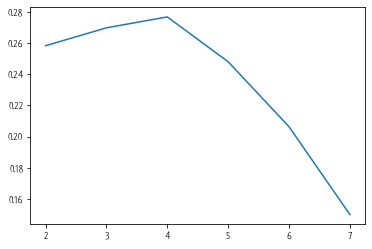

성동구 {2: 0.3936, 3: 0.3058, 4: 0.3384, 5: 0.2949, 6: 0.2127, 7: 0.1319}


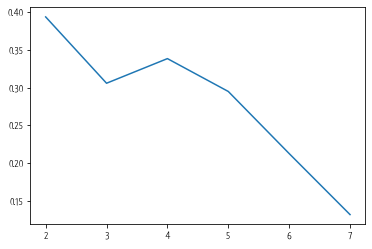

성북구 {2: 0.3875, 3: 0.3339, 4: 0.3477, 5: 0.2948, 6: 0.205, 7: 0.129}


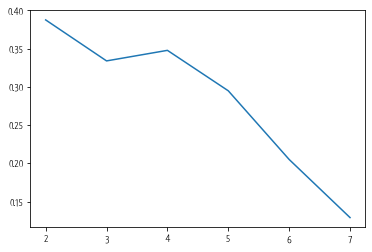

송파구 {2: 0.3398, 3: 0.2944, 4: 0.3008, 5: 0.2644, 6: 0.2035, 7: 0.1219}


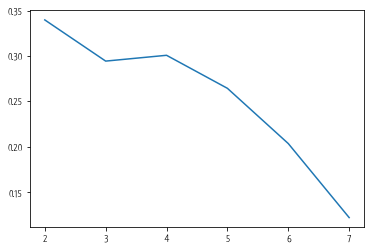

양천구 {2: 0.3587, 3: 0.3161, 4: 0.3279, 5: 0.2814, 6: 0.2149, 7: 0.1081}


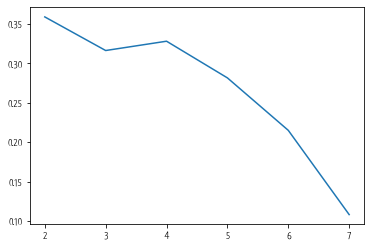

영등포구 {2: 0.34, 3: 0.3044, 4: 0.3192, 5: 0.275, 6: 0.2078, 7: 0.1342}


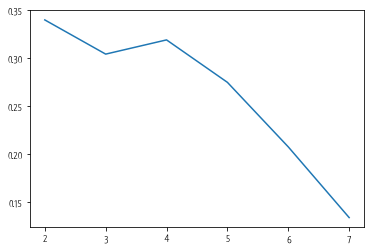

용산구 {2: 0.3601, 3: 0.3345, 4: 0.3392, 5: 0.2997, 6: 0.2205, 7: 0.1647}


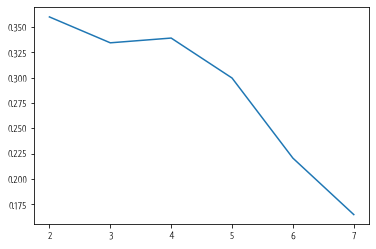

은평구 {2: 0.4664, 3: 0.3849, 4: 0.4067, 5: 0.3412, 6: 0.2311, 7: 0.1378}


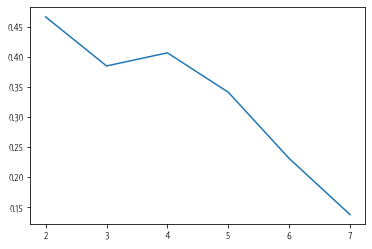

종로구 {2: 0.4034, 3: 0.3227, 4: 0.3145, 5: 0.2787, 6: 0.2204, 7: 0.1471}


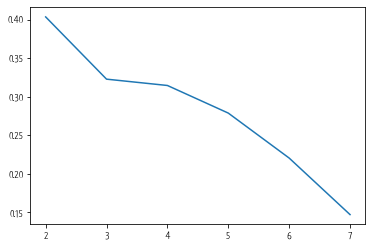

중구 {2: 0.4149, 3: 0.3362, 4: 0.343, 5: 0.2919, 6: 0.2358, 7: 0.155}


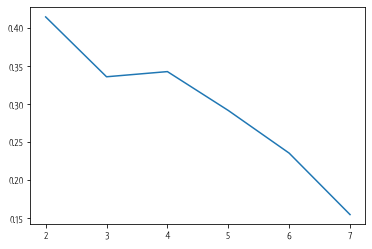

중랑구 {2: 0.4741, 3: 0.4203, 4: 0.4303, 5: 0.3669, 6: 0.2636, 7: 0.14}


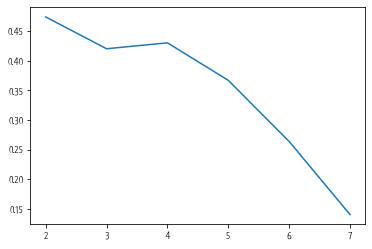

In [36]:
group = {}
for i in range(25):
    dic = {}
    for j in range(6):
        value = (df[age_group[j] & county_group[i]]['총소비금액']).mean() / (df[age_group[j] & county_group[i]]['총수신금액']).mean()
        dic[j+2] = round(value, 4)            
    group[county[i]] = dic

for i in range(25):
    print(county[i], group[county[i]])
    plt.plot(list(group[county[i]].keys()), list(group[county[i]].values()))
    plt.show()

---

# ✍🏻

## 클ㄹㅓ스터링

In [37]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

### 자치구 별 총수신금액 & 총소비금액

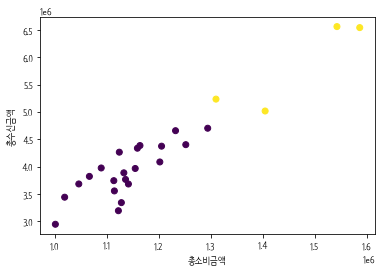

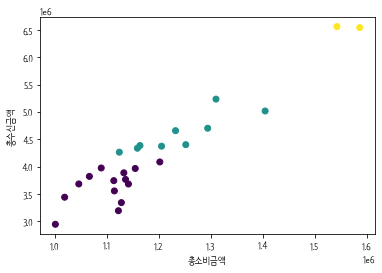

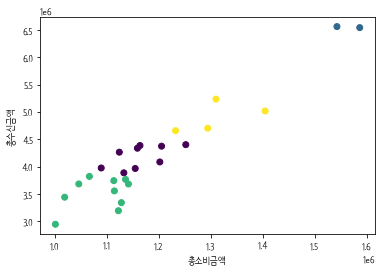

In [38]:
clug = df.groupby('지역구')[['총수신금액', '총소비금액']].mean()

# k=2,3,4
for i in range(2,5):
    kmeans = KMeans(n_clusters = i)
    cluster_ids = kmeans.fit_predict(clug)

    plt.scatter(clug['총소비금액'], clug['총수신금액'], c=cluster_ids)
    plt.xlabel("총소비금액")
    plt.ylabel("총수신금액")
    plt.show()

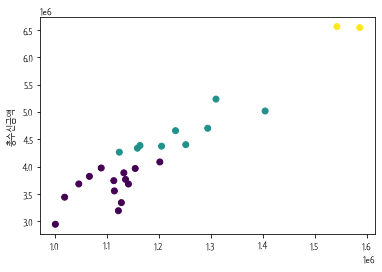

< 0 > :  ['강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '서대문구', '성북구', '은평구', '중랑구']
< 1 > :  ['동작구', '마포구', '성동구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중구']
< 2 > :  ['강남구', '서초구']


In [39]:
### k = 3 클러스터링 이 적합하다고 생각
kmeans = KMeans(n_clusters = 3)
cluster_ids = kmeans.fit_predict(clug)
plt.scatter(clug['총소비금액'], clug['총수신금액'], c=cluster_ids)
plt.ylabel("총수신금액")
plt.show()

clug['id']= kmeans.labels_
for i in range(3):
    print('<', i, '> : ', list(clug[clug['id'] == i].index))

### 자치구 별 급여입금 & 신용대출금액

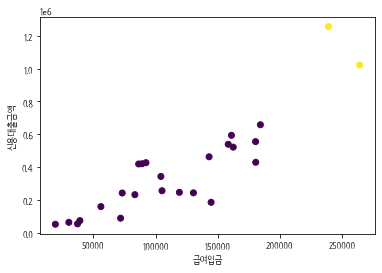

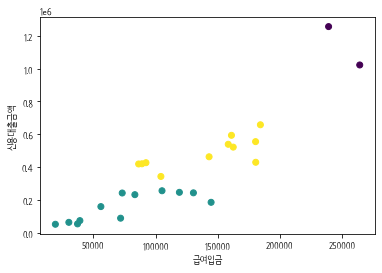

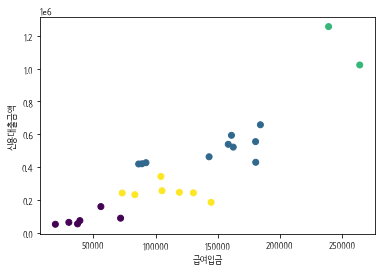

In [40]:
clug = df.groupby('지역구')[['급여입금' ,'신용대출금액']].mean()

# k=2,3,4
for i in range(2,5):
    kmeans = KMeans(n_clusters = i)
    cluster_ids = kmeans.fit_predict(clug)

    plt.scatter(clug['급여입금'], clug['신용대출금액'], c=cluster_ids)
    plt.xlabel("급여입금")
    plt.ylabel("신용대출금액")
    plt.show()

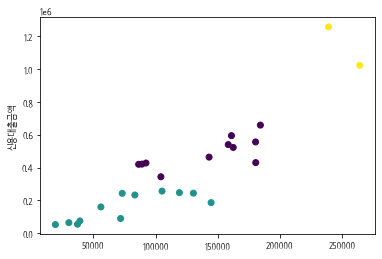

< 0 > :  ['강동구', '강서구', '노원구', '마포구', '성동구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중구']
< 1 > :  ['강북구', '관악구', '광진구', '구로구', '금천구', '도봉구', '동대문구', '동작구', '서대문구', '성북구', '은평구', '중랑구']
< 2 > :  ['강남구', '서초구']


In [41]:
### k = 3 클러스터링 이 적합하다고 생각
kmeans = KMeans(n_clusters = 3)
cluster_ids = kmeans.fit_predict(clug)
plt.scatter(clug['급여입금'], clug['신용대출금액'], c=cluster_ids)
plt.ylabel("신용대출금액")
plt.show()

clug['id']= kmeans.labels_
for i in range(3):
    print('<', i, '> : ', list(clug[clug['id'] == i].index))

### 자치구 별 총소비금액 & 가맹점매출입금

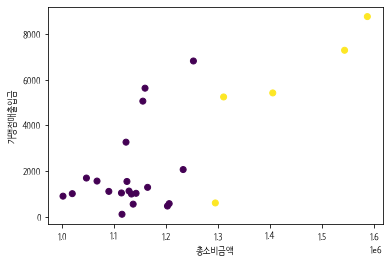

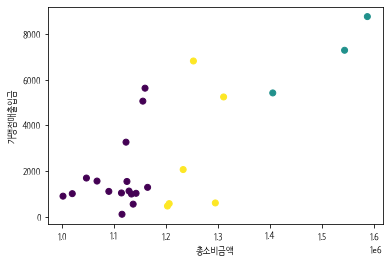

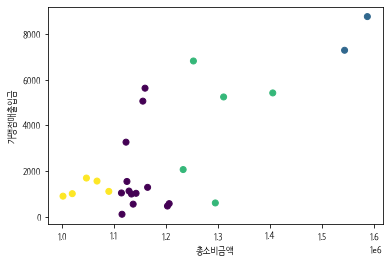

In [42]:
clug = df.groupby('지역구')[['총소비금액' ,'가맹점매출입금']].mean()

# k=2,3,4
for i in range(2,5):
    kmeans = KMeans(n_clusters = i)
    cluster_ids = kmeans.fit_predict(clug)

    plt.scatter(clug['총소비금액'], clug['가맹점매출입금'], c=cluster_ids)
    plt.xlabel("총소비금액")
    plt.ylabel("가맹점매출입금")
    plt.show()

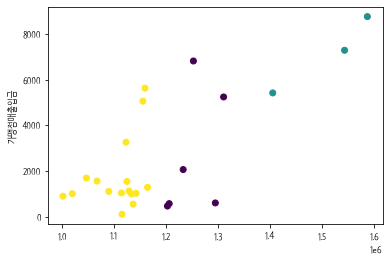

< 0 > :  ['강서구', '동작구', '마포구', '성동구', '송파구', '중구']
< 1 > :  ['강남구', '서초구', '용산구']
< 2 > :  ['강동구', '강북구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '서대문구', '성북구', '양천구', '영등포구', '은평구', '종로구', '중랑구']


In [43]:
### k = 3 클러스터링 이 적합하다고 생각
kmeans = KMeans(n_clusters = 3)
cluster_ids = kmeans.fit_predict(clug)
plt.scatter(clug['총소비금액'], clug['가맹점매출입금'], c=cluster_ids)
plt.ylabel("가맹점매출입금")
plt.show()

clug['id']= kmeans.labels_
for i in range(3):
    print('<', i, '> : ', list(clug[clug['id'] == i].index))